# ***Airline Passenger Refferel Prediction***
Project Type : Classification
Contributor's name : Md Ismail Quraishi

Problem Statement :
Data includes airline reviews from 2006 to 2009 for popular airlines around the world with multiple choice and free text questions. Data is scraped in the Spring 2019. The main objective is to predict whether passengers will refer the airline to their friends.

### Know About the dataset

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data loading
path = "data/data_airline_reviews.xlsx"
df = pd.read_excel(path)

In [3]:
# First look
df.head()

,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,route,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Turkish Airlines,7.0,Christopher Hackley,8th May 2019,âœ… Trip Verified | London to Izmir via Istanb...,NaN,Business,Economy Class,London to Izmir via Istanbul,2019-05-01 00:00:00,4.0,5.0,4.0,4.0,2.0,4.0,yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Turkish Airlines,2.0,Adriana Pisoi,7th May 2019,âœ… Trip Verified | Istanbul to Bucharest. We ...,NaN,Family Leisure,Economy Class,Istanbul to Bucharest,2019-05-01 00:00:00,4.0,1.0,1.0,1.0,1.0,1.0,no
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Print basic informations about the dataset
print('Shape :', df.shape)
print()
print('Columns :')
print(list(df.columns))
print()
print('Duplicated row count', df.duplicated().sum())

Shape : (131895, 17)

Columns :
['airline', 'overall', 'author', 'review_date', 'customer_review', 'aircraft', 'traveller_type', 'cabin', 'route', 'date_flown', 'seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money', 'recommended']

Duplicated row count 70711


In [5]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131895 entries, 0 to 131894
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          65947 non-null  object 
 1   overall          64017 non-null  float64
 2   author           65947 non-null  object 
 3   review_date      65947 non-null  object 
 4   customer_review  65947 non-null  object 
 5   aircraft         19718 non-null  object 
 6   traveller_type   39755 non-null  object 
 7   cabin            63303 non-null  object 
 8   route            39726 non-null  object 
 9   date_flown       39633 non-null  object 
 10  seat_comfort     60681 non-null  float64
 11  cabin_service    60715 non-null  float64
 12  food_bev         52608 non-null  float64
 13  entertainment    44193 non-null  float64
 14  ground_service   39358 non-null  float64
 15  value_for_money  63975 non-null  float64
 16  recommended      64440 non-null  object 
dtypes: float64

In [6]:
# Describe
df.describe()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
count,64017.000000,60681.000000,60715.000000,52608.000000,44193.000000,39358.000000,63975.000000
mean,5.145430,2.952160,3.191814,2.908170,2.863372,2.692820,2.943962
std,3.477532,1.441362,1.565789,1.481893,1.507262,1.612215,1.587370
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
50%,5.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,9.000000,4.000000,5.000000,4.000000,4.000000,4.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
# Missing count
df.isna().sum()

airline             65948
overall             67878
author              65948
review_date         65948
customer_review     65948
aircraft           112177
traveller_type      92140
cabin               68592
route               92169
date_flown          92262
seat_comfort        71214
cabin_service       71180
food_bev            79287
entertainment       87702
ground_service      92537
value_for_money     67920
recommended         67455
dtype: int64

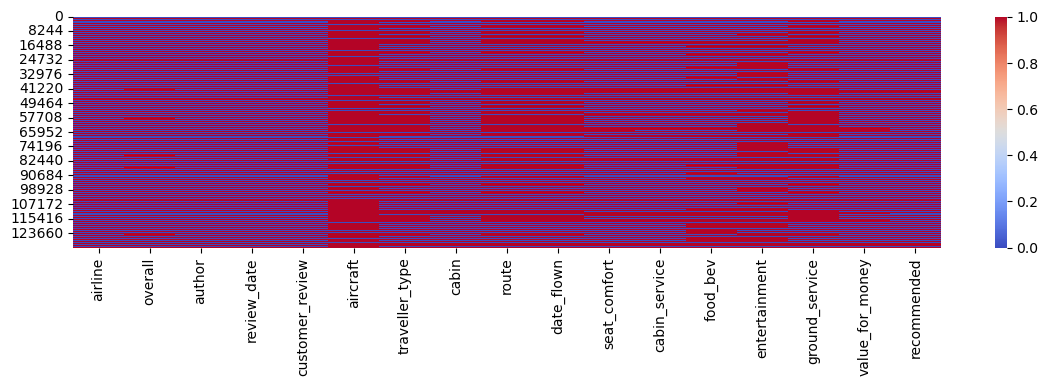

In [8]:
# Missing visualization
plt.rcParams['figure.figsize'] = (14,3)
sns.heatmap(df.isna(), cmap='coolwarm')
plt.show()

In [9]:
# Checking info where value for airline column is missing.
df[df['airline'].isna() == True].info()

<class 'pandas.core.frame.DataFrame'>
Index: 65948 entries, 0 to 131893
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          0 non-null      object 
 1   overall          0 non-null      float64
 2   author           0 non-null      object 
 3   review_date      0 non-null      object 
 4   customer_review  0 non-null      object 
 5   aircraft         0 non-null      object 
 6   traveller_type   0 non-null      object 
 7   cabin            0 non-null      object 
 8   route            0 non-null      object 
 9   date_flown       0 non-null      object 
 10  seat_comfort     0 non-null      float64
 11  cabin_service    0 non-null      float64
 12  food_bev         0 non-null      float64
 13  entertainment    0 non-null      float64
 14  ground_service   0 non-null      float64
 15  value_for_money  0 non-null      float64
 16  recommended      0 non-null      object 
dtypes: float64(7), o

I observed that entire row is missing for missing airline.

In [10]:
# Unique count for each column
df.nunique()

airline               81
overall               10
author             44069
review_date         3015
customer_review    61172
aircraft            2088
traveller_type         4
cabin                  4
route              24549
date_flown            63
seat_comfort           5
cabin_service          5
food_bev               5
entertainment          5
ground_service         5
value_for_money        5
recommended            2
dtype: int64

In [11]:
for col in df.columns:
    if col in ['author', 'review_date', 'customer_review', 'aircraft', 'route', 'date_flown']:
        pass
    else:
        print(f"{col} : {list(df[col].unique())}")
        print()

airline : [nan, 'Turkish Airlines', 'Qatar Airways', 'Emirates', 'Lufthansa', 'KLM Royal Dutch Airlines', 'Virgin America', 'American Airlines', 'Delta Air Lines', 'Southwest Airlines', 'United Airlines', 'Jetblue Airways', 'Aegean Airlines', 'Aeroflot Russian Airlines', 'Aeromexico', 'Air Canada', 'Air New Zealand', 'Alitalia', 'AirAsia', 'Asiana Airlines', 'Avianca', 'Austrian Airlines', 'British Airways', 'Brussels Airlines', 'China Eastern Airlines', 'China Southern Airlines', 'Copa Airlines', 'Ethiopian Airlines', 'Egyptair', 'Finnair', 'Iberia', 'ANA All Nippon Airways', 'easyJet', 'Korean Air', 'LATAM Airlines', 'LOT Polish Airlines', 'Qantas Airways', 'Air France', 'Etihad Airways', 'Pegasus Airlines', 'Royal Jordanian Airlines', 'Ryanair', 'South African Airways', 'Saudi Arabian Airlines', 'TAP Portugal', 'Eurowings', 'EVA Air', 'Royal Air Maroc', 'Singapore Airlines', 'SAS Scandinavian', 'Swiss Intl Air Lines', 'Thai Airways', 'Air India', 'Air Europa', 'Air Canada rouge', 'a

### About the dataset :
1. The dataset has 131895 rows and 17 columns where 70711 duplicate rows.
2. Till now I observed that entire rows has missing values where airline is nan.
3. Mean and median are almost same so I can say the dataset does not contain any outliers.

### EDA

In [12]:
print('Shape before : ',df.shape) # shape before
df.drop_duplicates(inplace=True) # Drop the duplicates
df = df[df['airline'].isna()== False] # Dropping those rows where value for airline is nan.
df = df[df['recommended'].isna()==False] # Droping those rows where values for the target variable is nan.
print('Shape after : ',df.shape) # Shape after

Shape before :  (131895, 17)
Shape after :  (59761, 17)


Earlier we had 131898 entries but after dropping unwanted rows we have only 59761.

In [13]:
top_10_authors = df['author'].value_counts().head(10) # Top 10 authors who did highest number of trip
top_10_typed_aircraft= df['aircraft'].value_counts().head(10) # Top 10 aircrafts mostly used for trip.
traveller_type_count = df['traveller_type'].value_counts() # Traveller type
highly_used_cabin = df['cabin'].value_counts() # cabin count
top_10_airline_with_highest_mean_of_overall = round(df.groupby(['airline'])['overall'].mean(),2).sort_values(ascending=False).head(10)
top_traveller_type = round(df.groupby(['traveller_type'])['overall'].mean(),2).sort_values(ascending=False)
top_cabin = round(df.groupby(['cabin'])['overall'].mean(),2).sort_values(ascending=False)

In [14]:
# Print
print('Value count for target column :')
print(df['recommended'].value_counts())
print()
print('Top 10 authors :')
print(top_10_authors)
print()
print('Top 10 type of aircrafts :')
print(top_10_typed_aircraft)
print()
print("# of traveller's type travelled most")
print(traveller_type_count)

Value count for target column :
recommended
no     31268
yes    28493
Name: count, dtype: int64

Top 10 authors :
author
Anders Pedersen    90
Michel Perrin      80
Jonathan Rodden    79
T Eldem            55
John Curtain       52
Colin Pay          51
Tercon Bojan       47
Neil Jeram         46
M Studzinski       45
J Bacallado        45
Name: count, dtype: int64

Top 10 type of aircrafts :
aircraft
A320                2130
A380                1109
Boeing 777          1101
Boeing 737-800      1021
A330                 974
Boeing 787           833
Boeing 777-300ER     737
Boeing 737           649
A321                 649
A319                 639
Name: count, dtype: int64

# of traveller's type travelled most
traveller_type
Solo Leisure      13934
Couple Leisure     9699
Family Leisure     7142
Business           6764
Name: count, dtype: int64


In [15]:
print('top 10 airline wiht highest mean rating')
print(top_10_airline_with_highest_mean_of_overall)
print()
print('top traveller type with highest mean rating')
print(top_traveller_type)
print()
print('top cabin with highest mean rating')
print(top_cabin)
print()

top 10 airline wiht highest mean rating
airline
Garuda Indonesia           8.28
EVA Air                    8.07
Asiana Airlines            8.06
ANA All Nippon Airways     7.87
China Southern Airlines    7.79
Aegean Airlines            7.78
Korean Air                 7.63
Bangkok Airways            7.59
Qatar Airways              7.52
Singapore Airlines         7.46
Name: overall, dtype: float64

top traveller type with highest mean rating
traveller_type
Solo Leisure      5.10
Business          4.47
Couple Leisure    4.36
Family Leisure    4.34
Name: overall, dtype: float64

top cabin with highest mean rating
cabin
Business Class     6.60
First Class        6.41
Premium Economy    5.39
Economy Class      4.83
Name: overall, dtype: float64



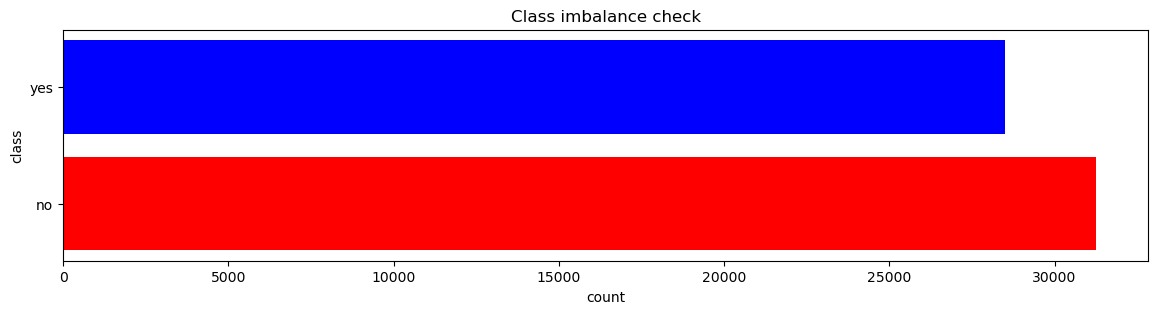

In [16]:
colors= ['red','blue','red','orange']
plt.barh(df['recommended'].value_counts().index, df['recommended'].value_counts().values, color=colors)
plt.title('Class imbalance check')
plt.xlabel('count')
plt.ylabel('class')
plt.show()

Target variable has almost balance number of classes.

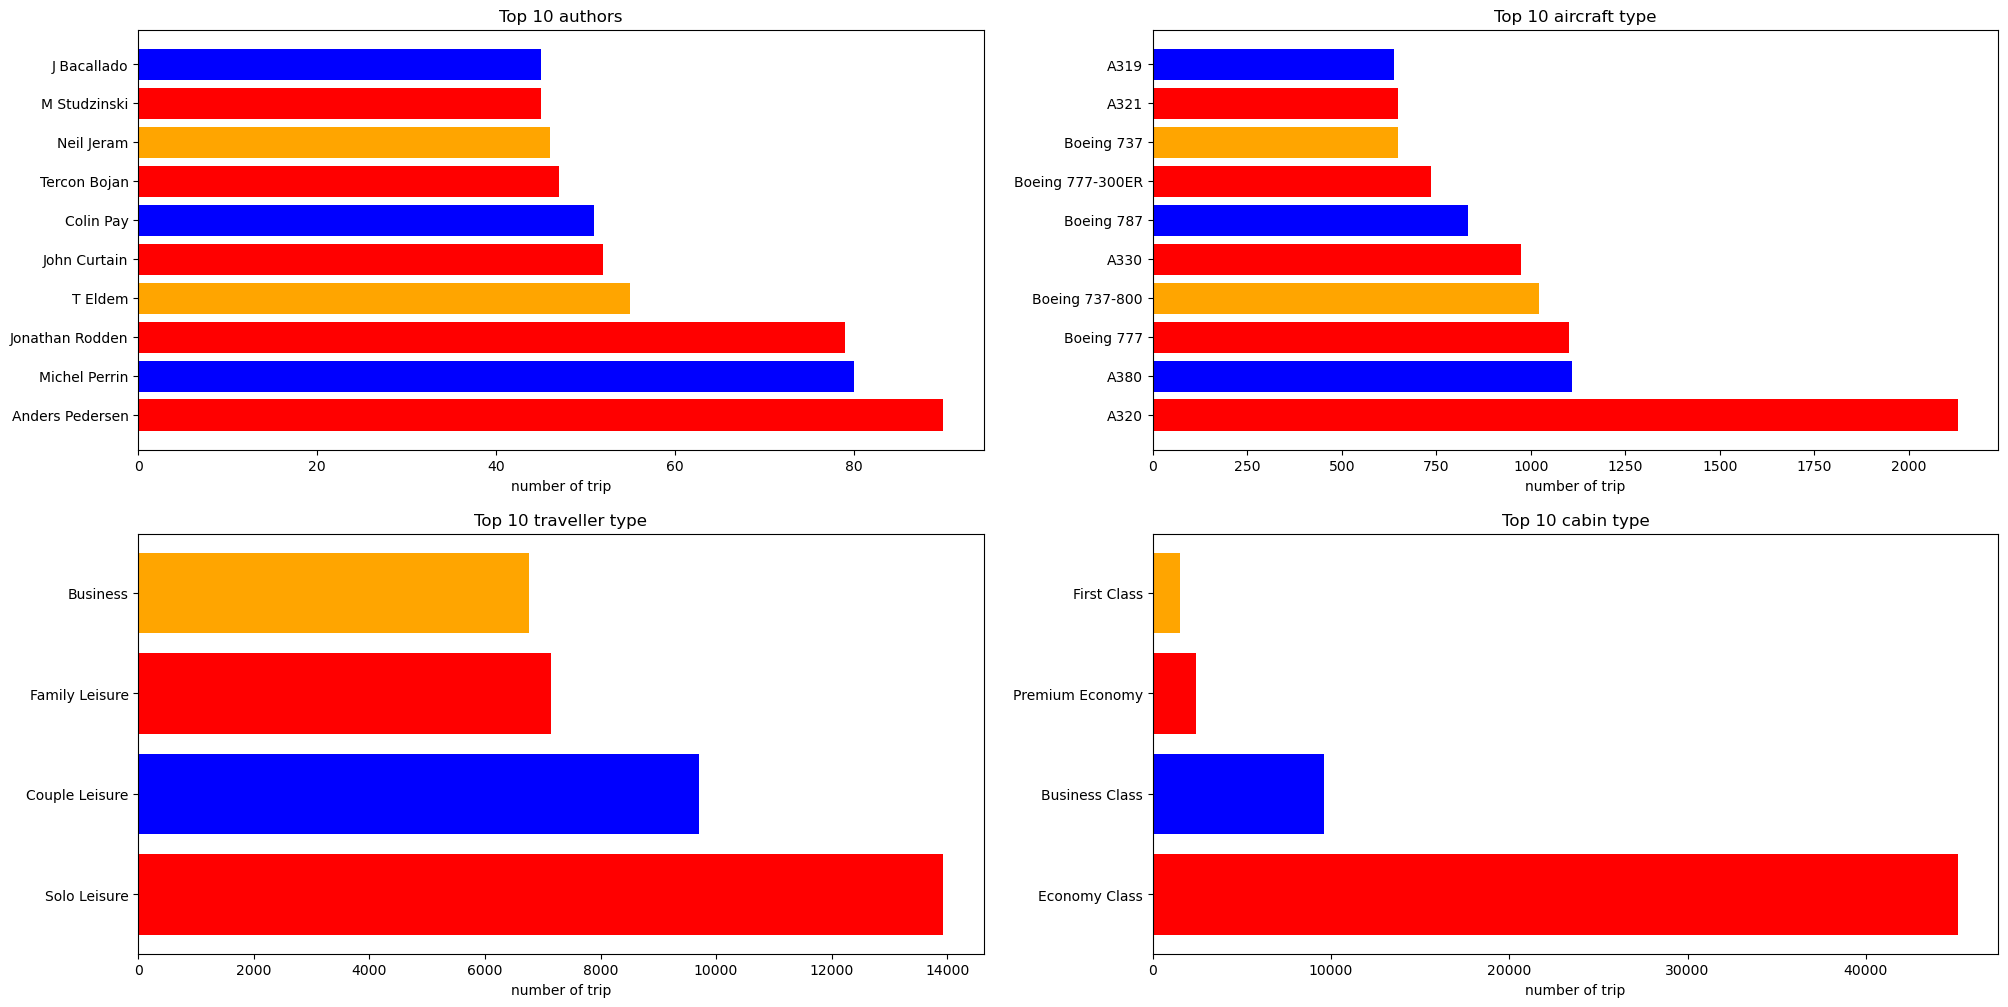

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(24,12))
ax[0][0].barh(top_10_authors.index, top_10_authors.values,color=colors)
ax[0][0].set_title('Top 10 authors')
ax[0][0].set_xlabel('number of trip')

ax[0][1].barh(top_10_typed_aircraft.index, top_10_typed_aircraft.values,color=colors)
ax[0][1].set_title('Top 10 aircraft type')
ax[0][1].set_xlabel('number of trip')

ax[1][0].barh(traveller_type_count.index, traveller_type_count.values,color=colors)
ax[1][0].set_title('Top 10 traveller type')
ax[1][0].set_xlabel('number of trip')

ax[1][1].barh(highly_used_cabin.index, highly_used_cabin.values,color=colors)
ax[1][1].set_title('Top 10 cabin type')
ax[1][1].set_xlabel('number of trip')
plt.show()

***From the above figure we observed that***
1. Most of the people travels alone.
2. Economy class is mostly used for trip.

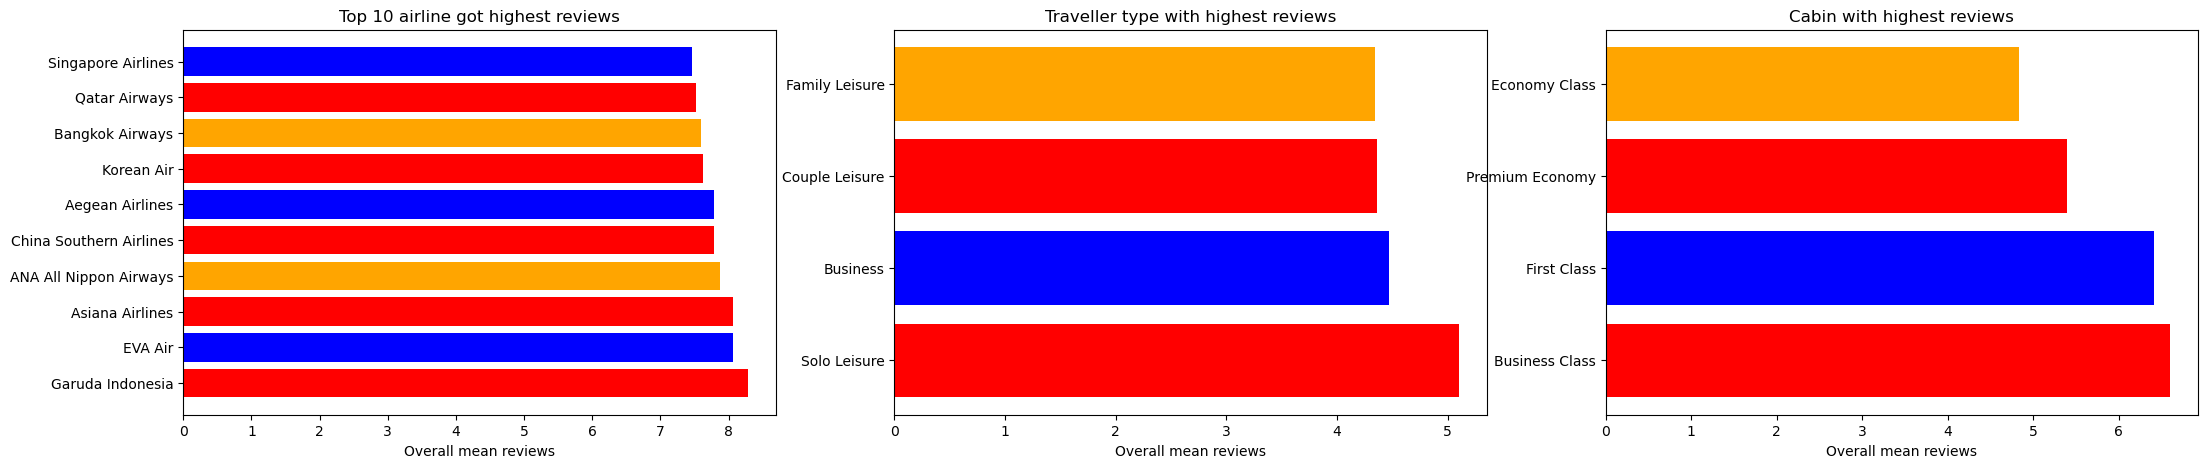

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 5))
ax[0].barh(top_10_airline_with_highest_mean_of_overall.index,top_10_airline_with_highest_mean_of_overall.values,color=colors)
ax[0].set_title('Top 10 airline got highest reviews')
ax[0].set_xlabel('Overall mean reviews')

ax[1].barh(top_traveller_type.index,top_traveller_type.values, color=colors)
ax[1].set_title('Traveller type with highest reviews')
ax[1].set_xlabel('Overall mean reviews')

ax[2].barh(top_cabin.index,top_cabin.values, color=colors)
ax[2].set_title('Cabin with highest reviews')
ax[2].set_xlabel('Overall mean reviews')
plt.show()

Mean ratings are almost similar for all the above figures.

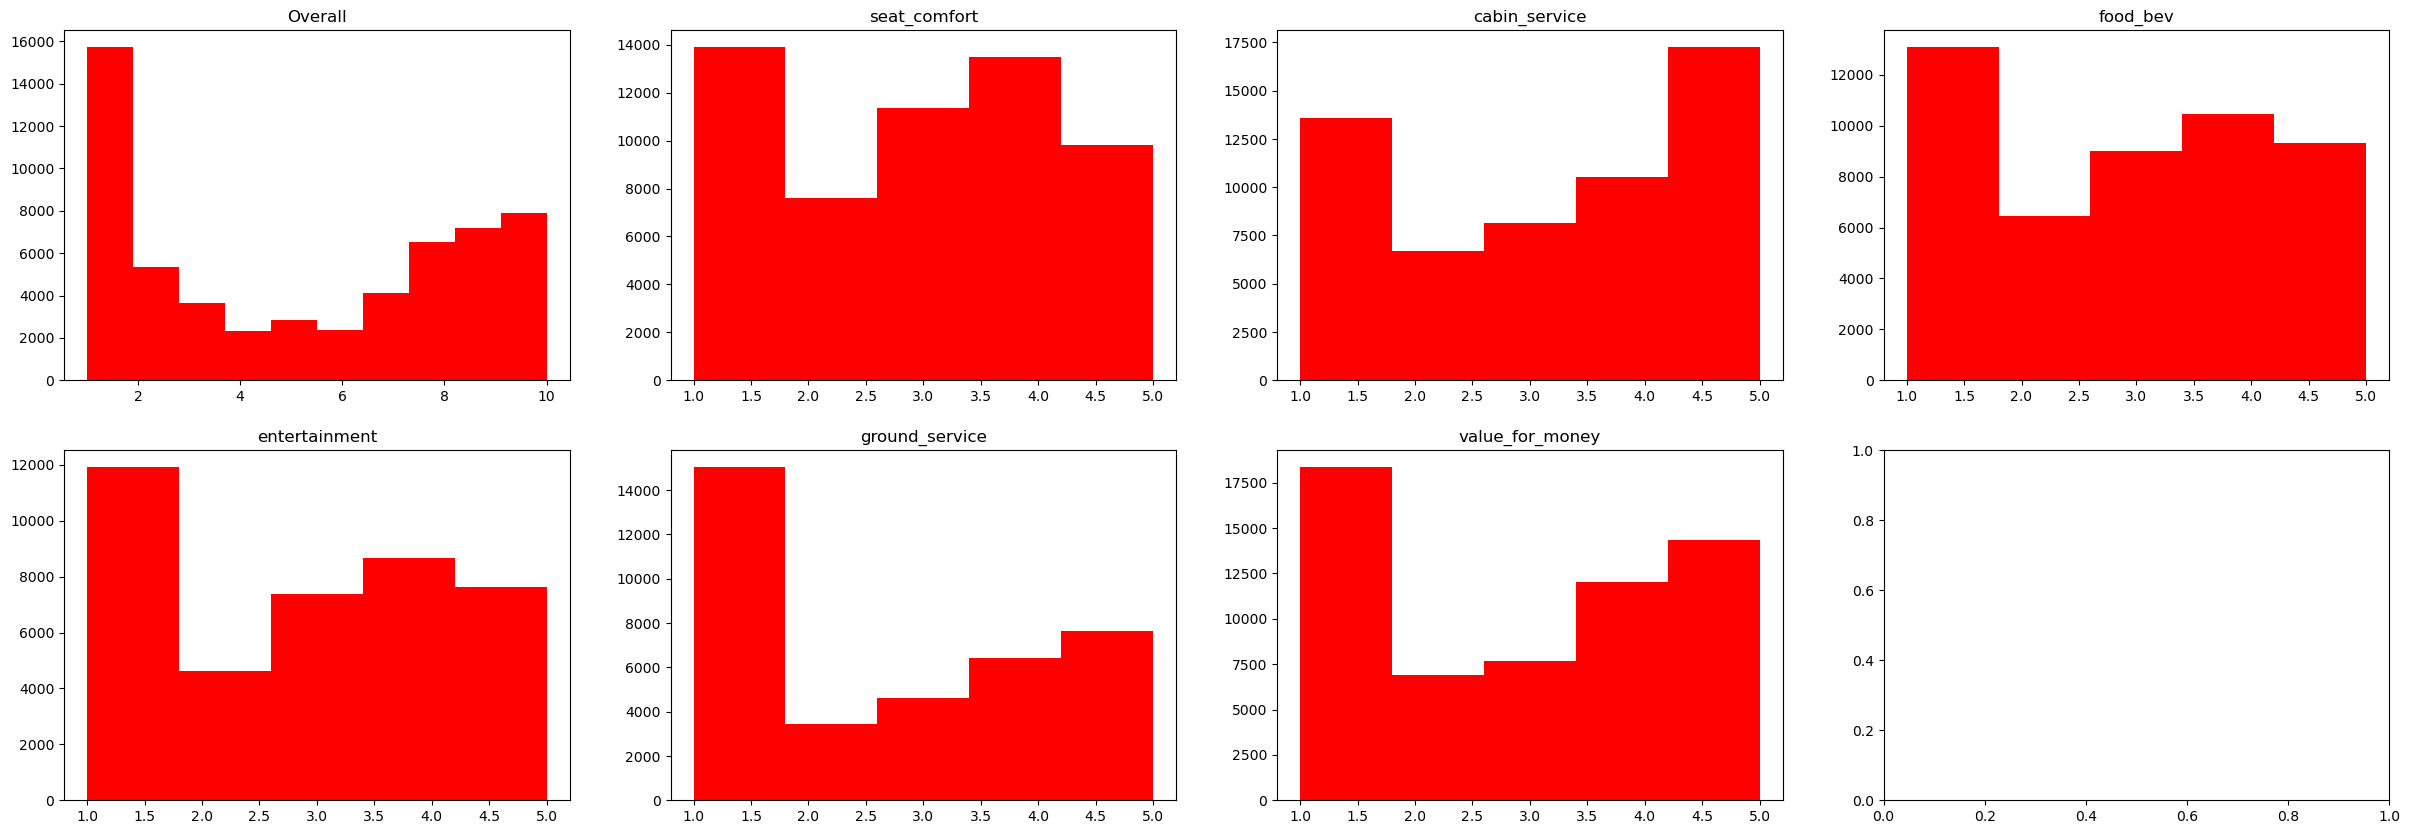

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(30,10))
ax[0][0].hist(df['overall'], bins=10, color='red')
ax[0][0].set_title('Overall')
 
ax[0][1].hist(df['seat_comfort'], bins=5, color= 'red')
ax[0][1].set_title('seat_comfort')

ax[0][2].hist(df['cabin_service'], bins=5, color='red')
ax[0][2].set_title('cabin_service')

ax[0][3].hist(df['food_bev'], bins=5, color='red')
ax[0][3].set_title('food_bev')
 
ax[1][0].hist(df['entertainment'], bins=5, color= 'red')
ax[1][0].set_title('entertainment')

ax[1][1].hist(df['ground_service'], bins=5, color='red')
ax[1][1].set_title('ground_service')

ax[1][2].hist(df['value_for_money'], bins=5, color='red')
ax[1][2].set_title('value_for_money')

plt.show()

Our numeric columns do not follow normal distribution therefore linear regression will not be a good choice.